In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [24]:
SHEET_ID = "1fzemYbCUpiBTbCmCyIiRgAIjCQe_fNG1EBXAaliffNw"

In [25]:
comida = pd.DataFrame()
for month in ["Enero", "Febrero", "Marzo", "Abril", "Mayo"]:
    dt = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={month}&range=A13:B")
    comida = pd.concat([comida, dt], ignore_index=True)
comida["Descripcion"] = comida["Descripcion"].apply(lambda str: str.lower().replace(" ","").capitalize())
comida["Precio"] = comida["Precio"].apply(lambda str: float(str[:-2].replace(",", ".")))

In [26]:
comidaNew = comida.groupby("Descripcion").sum()
comidaNew["Max"] = comida.groupby("Descripcion").max()
comidaNew["Min"] = comida.groupby("Descripcion").min()
comidaNew["AVG"] = comida.groupby("Descripcion").mean().round(2)
comidaNew["Count"] = comida.groupby("Descripcion").count()
comidaNew.sort_values("Count", ascending=False, inplace=True)
comidaNew.reset_index(inplace=True)
comidaNew.rename(columns={"Descripcion": "Supermercado", "Precio": "Total"}, inplace=True)
comidaNew

,Supermercado,Total,Max,Min,AVG,Count
0,Condis,229.82,41.70,1.39,17.68,13
1,Lidl,105.66,24.98,4.79,13.21,8
2,Mercadona,64.20,41.21,4.40,16.05,4
3,Bonpreu,15.52,12.74,2.78,7.76,2
4,Amatller,33.00,33.00,33.00,33.00,1
5,Bonarea,4.30,4.30,4.30,4.30,1


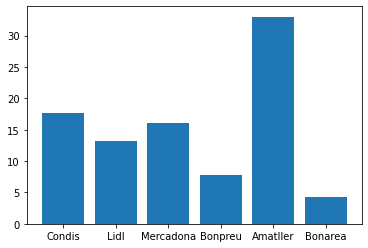

In [27]:
plt.bar(comidaNew["Supermercado"], comidaNew["AVG"])
plt.show()

Text(0.5, 0, 'Supermercados')

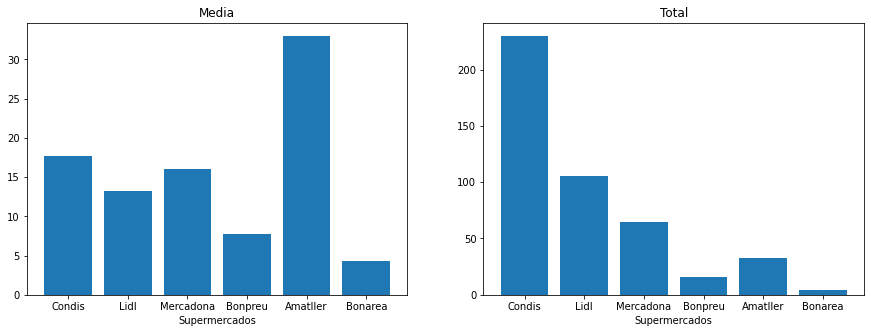

In [28]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].bar(comidaNew["Supermercado"].sort_values(), comidaNew["AVG"])
axes[0].set_title("Media")
axes[0].set_xlabel("Supermercados")
axes[1].bar(comidaNew["Supermercado"], comidaNew["Total"])
axes[1].set_title("Total")
axes[1].set_xlabel("Supermercados")

/Users/davidbenitezriba/anaconda3/envs/graficos/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


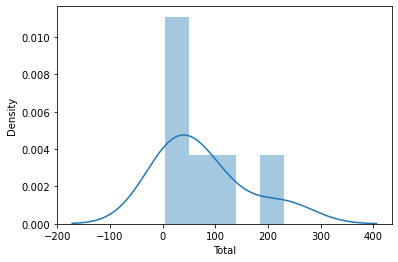

In [40]:
sb.distplot(comidaNew["Total"], bins=5)

/Users/davidbenitezriba/anaconda3/envs/graficos/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total', ylabel='Density'>

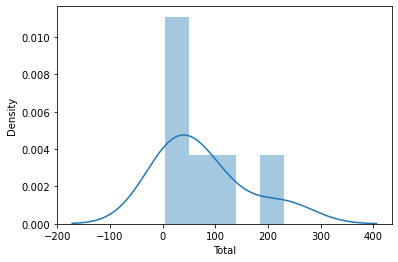

In [53]:
sb.distplot(comidaNew["Total"], bins=5)